In [1]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from plyfile import PlyData, PlyElement

import json
import numpy as np

In [ ]:
ply = PlyData.read("cuboid.ply")

In [20]:
with open("cube.json") as file:
    verts = json.load(file)

In [21]:
labels = KMeans(n_clusters=4).fit_predict(verts)

In [22]:
clusters = {
    label: [verts[idx] for idx, lab in enumerate(labels) if lab == label]
    for label in np.unique(labels)
}

PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('nx', 'float'), PlyProperty('ny', 'float'), PlyProperty('nz', 'float')), count=0, comments=[])

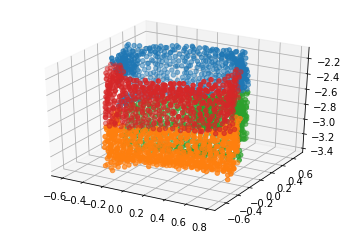

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for clst in clusters:
    ax.scatter(*list(zip(*clusters[clst])))
plt.show()

In [24]:
import plotly.express as px
import pandas as pd

In [25]:
labels = KMeans(n_clusters=3).fit_predict(verts)

In [26]:
raw = list(zip(*verts))
data = pd.DataFrame()
data["x"] = raw[0]
data["y"] = raw[1]
data["z"] = raw[2]
data["label"] = labels
data["size"] = [.1 for i in range(len(data))]

In [27]:
import plotly.express as px
fig = px.scatter_3d(data, x='x', y='y', z='z', color='label')
fig.update_yaxes(matches=None, showticklabels=False, visible=False)

In [32]:
class ClusterPoint:
    def __init__(self, primitive:str):
        self.primitive = primitive
        
    def fit(self, vertices):
        self.raw = vertices
        self.data = pd.DataFrame()
        self.data["x"] = list(zip(*self.raw))[0]
        self.data["y"] = list(zip(*self.raw))[1]
        self.data["z"] = list(zip(*self.raw))[2]
        return self
    
    def predict(self, **kwargs):
        return KMeans(**kwargs).fit_predict(self.raw)
    
    def fit_predict(self, vertices, **kwargs):
        self.fit(vertices)
        predict = self.predict(**kwargs)
        self.data["label"] = predict
        fig = px.scatter_3d(self.data, x='x', y='y', z='z', color='label')
        fig.show()
        
        return predict

In [29]:
with open("cube.json") as file:
    verts = json.load(file)

In [33]:
ClusterPoint("cylinder").fit_predict(verts)

array([7, 7, 7, ..., 6, 6, 3], dtype=int32)

In [ ]:
from sklearn import datasets

In [ ]:
#data = datasets.make_moons()
data = datasets.make_circles()

In [19]:
labels = AffinityPropagation().fit(data[0])
labels = labels.predict(data[0])
labels
#plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==0]))
#plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==1]))

KeyError: 0

In [18]:
labels = KMeans(n_clusters=2, n_init=1, init=np.array([[-1,0],[1,0]])).fit_predict(data[0])
plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==0]))
plt.scatter(*zip(*[p for i, p in enumerate(data[0]) if labels[i]==1]))

KeyError: 0